In [8]:
# Timothy Chui
# 37695129

import numpy as np

In [9]:
# Problem 1
# All amounts in tonnes, all rates in tonnes/year

# Constants/Coefficients
MA = 5600e12
MF = 360e12
MO = 50000e12

P1 = 1000
P2 = 2000
L1 = 200
L2 = 500
Q = 36e12
L3 = 0.05

# Solve Cx = D

C = np.array([[(-L1-L2)/MA - L3, L2/MF, L1/MO], [L2/MA, (-L2-Q)/MF - L3, 0], [L1/MA, Q/MF, (-L1)/MO - L3]])
D = np.array([-P1, -P2, 0])
print("Matrix C with coefficients is:")
print(C)
print("\n")
print("Matrix D with constants is:")
print(D)
print("\n")

# via solve method (which uses matrix inversion)
x = np.linalg.solve(C,D)
print("Using linalg.solve:")
print(x)
# verify solution is correct
print(np.allclose(np.dot(C, x), D))
print("\n")

# via manual matrix inversion
inv_C = np.linalg.inv(C)
x = np.dot(inv_C, D)
print("Solving by manually inverting C:")
print(x)

Matrix C with coefficients is:
[[ -5.00000000e-02   1.38888889e-12   4.00000000e-15]
 [  8.92857143e-14  -1.50000000e-01   0.00000000e+00]
 [  3.57142857e-14   1.00000000e-01  -5.00000000e-02]]


Matrix D with constants is:
[-1000 -2000     0]


Using linalg.solve:
[ 20000.00000032  13333.33333322  26666.66666646]
True


Solving by manually inverting C:
[ 20000.00000032  13333.33333322  26666.66666646]


In [10]:
# Problem 2

def diff_sys_matrix(N, include_boundaries=False):
    """Creates a matrix from a positive integer N, with 0-based indexing
    
    Matrix generated by using the discretized centred-difference approximation to u_xx
    
    Input: N, integer >= 3
           include_boundaries, boolean -> set to False if BCs are not to be included in system ((N+1) X (N+1))
                                               True if BCs are to be included in system ((N-1) X (N-1))
                                               
           
    Example: N=3, include_boundaries=False
    
    out_matrix = [[1 0 0 0]       (Shape: 4 X 4)
                  [1 -2 1 0]
                  [0 1 -2 1]
                  [0 0 0 1]]
                  
    Example: N=3, include_boundaries=True
     
    out_matrix = [[-2 1]          (Shape: 2 X 2)
                  [1 -2]]
                  
    """
    
    import numpy as np
    
    if (N >= 3) and (type(N) == int):
    
        if not include_boundaries: # Shape: (N+1) X (N+1)
            out_matrix = np.zeros((N+1,N+1))
            out_matrix[0,0] = 1

            for i in range(1,N): # loop through non-boundaries rows
                out_matrix[i,i-1] = 1
                out_matrix[i,i] = -2
                out_matrix[i,i+1] = 1

            out_matrix[N,N] = 1
            
        else: # Shape: (N-1) X (N-1)
            out_matrix = np.zeros((N-1,N-1))

            for i in range(0,N-1): # loop through all rows
                out_matrix[i,i] = -2
                
                # put a 1 in the column before if not the first row
                if i != 0: # couldn't use try/except, because np.array indexes in reverse with negative indices
                    out_matrix[i,i-1] = 1
                    
                try: # try indexing one column after
                    out_matrix[i,i+1] = 1
                except: # last row in matrix, quit loop
                    break
                    
        return out_matrix
    
    else: # if N is not an integer or greater than/equal to 3
        raise Exception("N must be a positive integer >= 3")
    

In [11]:
# a.) 

import numpy as np

N_array = np.arange(5,51,1)

print("BCs not substituted into equations\n")
for N in N_array:
    N_matrix = diff_sys_matrix(int(N))
    K = np.linalg.cond(N_matrix)
    print("N = {} matrix has K = {}".format(N, K))

BCs not substituted into equations

N = 5 matrix has K = 10.994600319765423
N = 6 matrix has K = 15.23311898662831
N = 7 matrix has K = 20.336526151680214
N = 8 matrix has K = 26.287086421268754
N = 9 matrix has K = 33.07381141107935
N = 10 matrix has K = 40.689754983885045
N = 11 matrix has K = 49.13030203691628
N = 12 matrix has K = 58.392252454211835
N = 13 matrix has K = 68.47331058874028
N = 14 matrix has K = 79.37178441258168
N = 15 matrix has K = 91.08639877131677
N = 16 matrix has K = 103.61617450397387
N = 17 matrix has K = 116.96034750138996
N = 18 matrix has K = 131.1183129832249
N = 19 matrix has K = 146.0895862333644
N = 20 matrix has K = 161.87377437504136
N = 21 matrix has K = 178.470555725069
N = 22 matrix has K = 195.8796644568532
N = 23 matrix has K = 214.10087904813582
N = 24 matrix has K = 233.13401346969752
N = 25 matrix has K = 252.97891038744967
N = 26 matrix has K = 273.6354358625635
N = 27 matrix has K = 295.1034751794839
N = 28 matrix has K = 317.3829295323215

In [12]:
# c.)

print("BCs substituted into equations\n")
for N in N_array:
    N_matrix = diff_sys_matrix(int(N), include_boundaries=True)
    K = np.linalg.cond(N_matrix)
    print("N = {} matrix has K = {}".format(N, K))

BCs substituted into equations

N = 5 matrix has K = 9.472135954999578
N = 6 matrix has K = 13.92820323027552
N = 7 matrix has K = 19.195669358089212
N = 8 matrix has K = 25.27414236908825
N = 9 matrix has K = 32.163437477526365
N = 10 matrix has K = 39.86345818906141
N = 11 matrix has K = 48.37415007870842
N = 12 matrix has K = 57.69548054098111
N = 13 matrix has K = 67.82742906960385
N = 14 matrix has K = 78.76998224097143
N = 15 matrix has K = 90.52313096777449
N = 16 matrix has K = 103.08686891981762
N = 17 matrix has K = 116.46119157748753
N = 18 matrix has K = 130.646095643861
N = 19 matrix has K = 145.64157866809745
N = 20 matrix has K = 161.44763879759168
N = 21 matrix has K = 178.0642746108616
N = 22 matrix has K = 195.4914850025211
N = 23 matrix has K = 213.72926910250666
N = 24 matrix has K = 232.77762621840822
N = 25 matrix has K = 252.6365557936474
N = 26 matrix has K = 273.30605737670925
N = 27 matrix has K = 294.78613059821254
N = 28 matrix has K = 317.0767751535881
N = 

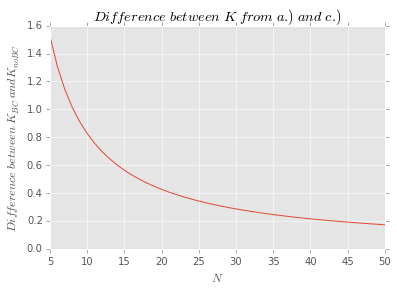

In [13]:
# plot difference

import matplotlib.pyplot as plt

%matplotlib inline
K_noBCs = []
K_BCs = []
K_diff = []
for N in N_array:
    N_matrix_noBCs = diff_sys_matrix(int(N), include_boundaries=False)
    N_matrix_BCs = diff_sys_matrix(int(N), include_boundaries=True)
    K_diff.append(np.linalg.cond(N_matrix_BCs) - np.linalg.cond(N_matrix_noBCs))

fig,ax = plt.subplots(1,1)
plt.style.use('ggplot')

ax.plot(N_array, np.abs(K_diff))
ax.set(title=r'$Difference\ between\ K\ from\ a.)\ and\ c.)$')
ax.set(ylabel=r'$Difference\ between\ K_{BC}\ and K_{noBC}$')
ax.set(xlabel=r'$N$')
plt.show()

# Difference appears to drop off exponentially; significant difference at low N, insignificant at high N
# Slight decrease in condition number for matrices with BC included in equations